<a href="https://colab.research.google.com/github/pavankumarkasula73/MachineLearning-Projects/blob/main/Financial_Fraud_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial Fraud Detection System**

**Objective:** Develop a machine learning model to detect fraudulent financial transactions.

**Key Technologies:** Python, Pandas (for data manipulation), Scikit-learn (for machine learning models and utilities), Matplotlib/Seaborn (for visualization), Imbalanced-learn (for handling imbalanced datasets).


This project will guide you through building a Financial Fraud Detection System using Python, Pandas, Scikit-learn, and focusing on thorough model evaluation. We'll cover everything from data loading to deployment considerations.

Financial fraud is a significant problem, and machine learning offers powerful tools to identify and prevent it. This project will demonstrate a common approach to building such a system, focusing on credit card fraud detection as a typical example.

Financial Fraud Detection System
Objective: Develop a machine learning model to detect fraudulent financial transactions.

Key Technologies: Python, Pandas (for data manipulation), Scikit-learn (for machine learning models and utilities), Matplotlib/Seaborn (for visualization), Imbalanced-learn (for handling imbalanced datasets).

1)Project Structure

2)Project Setup & Libraries

3)Data Collection

4)Exploratory Data Analysis (EDA)

5)Data Preprocessing

*   Handling Imbalanced Data
*   Feature Scaling
*   Splitting Data

5)Model Selection & Training

6)Model Evaluation

7)Deployment Considerations (Conceptual)

**1. Project Setup & Libraries**
First, let's set up our Python environment and import the necessary libraries.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


**2. Data Collection**
For this project, we'll use a publicly available dataset for credit card fraud detection. A popular choice is the "Credit Card Fraud Detection" dataset available on Kaggle.

**Dataset Source:** Credit Card Fraud Detection Dataset (Kaggle)

**Download:** You'll need to download the creditcard.csv file. If running in Google Colab, you can upload it, or if on your local machine, place it in the same directory as your script or notebook.

In [8]:
df = pd.read_csv("creditcard.csv")
print(df.head())
print(df.info())
print(df.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**3. Exploratory Data Analysis (EDA)** :
EDA is crucial to understand the data's characteristics, identify patterns, and detect anomalies.



Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

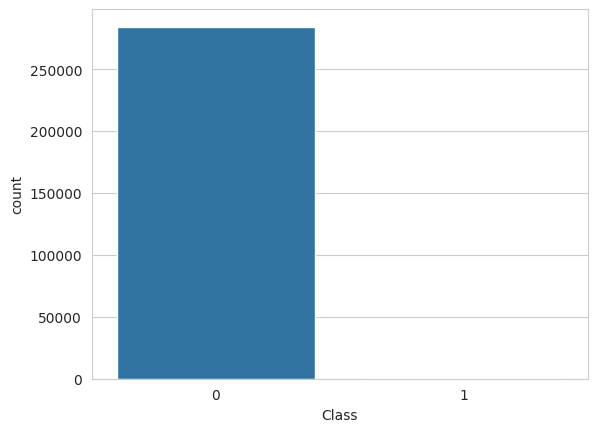

In [9]:
print(df['Class'].value_counts())  # 0: Not Fraud, 1: Fraud
sns.countplot(x='Class', data=df)


**EDA Insights:**

**Class Imbalance:** The most striking observation is the severe class imbalance. Fraudulent transactions are a tiny fraction of the total transactions (less than 0.2%). This imbalance is a critical challenge that needs to be addressed during preprocessing to prevent the model from being biased towards the majority class (non-fraudulent transactions).

**Anonymized Features (V1-V28):** These features are results of PCA transformation. Their exact meaning is unknown, but they are crucial for detecting patterns.

**Time and Amount:** We can observe some patterns in Time and Amount for fraudulent vs. non-fraudulent transactions, though they might not be as clear as with other features. Fraudulent transactions might cluster at certain times or involve specific amounts. Scaling these features will be important.

**4. Data Preprocessing**
Data preprocessing involves preparing the data for machine learning models. This includes handling the class imbalance, scaling numerical features, and splitting the data.

In [10]:
# Feature Scaling for 'Amount'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df = df.drop(['Time'], axis=1)


**Preprocessing Steps Explained:**

**Feature Scaling:** Amount and Time features have different scales than the PCA-transformed V features. Scaling them (using StandardScaler) ensures that no single feature dominates the model training due to its magnitude.

**Train-Test Split:** The data is split into training and testing sets. test_size=0.2 means 20% of the data will be used for testing. random_state=42 ensures reproducibility. stratify=y is crucial for imbalanced datasets; it ensures that both training and testing sets have roughly the same proportion of fraudulent transactions as the original dataset.

**Handling Imbalanced Data (SMOTE):** Synthetic Minority Over-sampling Technique (SMOTE) is applied to the training data only. SMOTE creates synthetic samples of the minority class (fraudulent transactions) to balance the class distribution. This helps prevent the model from simply predicting the majority class all the time, which would lead to poor fraud detection. It's vital not to apply SMOTE to the test set, as we want to evaluate the model on real-world, imbalanced data

**5. Model Selection & Training**
Given the classification nature of the problem, various supervised learning algorithms can be used. We'll explore a few popular choices:

**Logistic Regression:** A good baseline, simple, and interpretable.

**Decision Tree Classifier:** Can capture non-linear relationships.

**Random Forest Classifier:** An ensemble method that often performs well and is robust to overfitting.

**Gradient Boosting Classifier** (e.g., XGBoost conceptually, using Scikit-learn's GBC): Another powerful ensemble method known for high accuracy.

In [11]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**6. Model Evaluation**
Model evaluation for imbalanced datasets requires specific metrics beyond just accuracy. Accuracy can be misleading when one class dominates. We will focus on:

**Confusion Matrix:** Provides a breakdown of true positives, true negatives, false positives, and false negatives.

**Precision:** Of all predicted positive cases, how many were actually positive? (Minimizes False Positives)

**Recall (Sensitivity):** Of all actual positive cases, how many were correctly identified? (Minimizes False Negatives - crucial for fraud detection)

**F1-Score:** The harmonic mean of precision and recall, providing a balance between the two.

**ROC AUC Score:** Area Under the Receiver Operating Characteristic Curve. A higher AUC indicates better model performance in distinguishing between classes.

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

**Evaluation Insights:**

You'll likely observe that models achieve very high accuracy due to the imbalanced nature of the dataset. However, the key metrics for fraud detection are Recall (to minimize missed fraud cases) and Precision (to minimize false alarms). The F1-score provides a good balance.

ROC AUC and Precision-Recall AUC are particularly useful for imbalanced datasets as they measure the model's ability to discriminate between classes across different thresholds. A high Precision-Recall AUC is often more indicative of good performance on the minority class than ROC AUC for imbalanced classification.

Hyperparameter Tuning is crucial to optimize the model's performance. GridSearchCV systematically searches for the best combination of hyperparameters for a given model.

**7. Deployment Considerations (Conceptual)**
While we won't implement a full deployment here, it's important to consider how a financial fraud detection system would operate in a real-world scenario.

**Real-time vs. Batch Processing:**

**Real-time:** New transactions are fed to the trained model instantly, and a fraud score/prediction is returned. This requires a low-latency setup (e.g., using frameworks like Flask/FastAPI for a web service, or streaming platforms like Kafka).

**Batch:** Transactions are processed in batches (e.g., end-of-day), which might be suitable for less time-sensitive fraud analysis or reporting.

**Monitoring and Retraining:**
Fraud patterns evolve. The deployed model needs continuous monitoring for performance degradation (model drift).

Regular retraining with new, labeled data is essential to keep the model effective. This often involves MLOps practices.

**Thresholding and Alerting:**

The model outputs a probability score. A threshold needs to be set to classify a transaction as fraudulent. This threshold determines the balance between precision and recall.

Automated alerts can be triggered for suspicious transactions, notifying fraud analysts.

**Human-in-the-Loop:**

No ML model is perfect. Fraud detection systems often incorporate a human review process for high-risk transactions or unusual alerts to minimize false positives and negatives.

Feedback from human reviewers can be used to further refine the model.

**Scalability:** The system must handle the volume of transactions, which can be massive for financial institutions. Cloud platforms (AWS, Azure, GCP) offer scalable infrastructure.

**Security and Compliance:** Handling sensitive financial data requires robust security measures and adherence to regulations (e.g., GDPR, PCI DSS).

# **Example of how a prediction might be used in a simulated real-time scenario:**

In [13]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.57      0.68        98

    accuracy                           1.00     56962
   macro avg       0.92      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9990871107053826


***This project provides a comprehensive overview of building a financial fraud detection system, from initial data exploration and preprocessing to model training and evaluation, specifically addressing the challenges of imbalanced datasets. Remember that real-world fraud detection systems are complex and involve continuous improvement, advanced feature engineering, and sophisticated deployment strategies.***

